# TF-IDF, WoE, CBoW

# TF-IDF



### TF-IDF (Term Frequency – Inverse Document Frequency)

TF-IDF adalah salah satu metode yang digunakan dalam **text mining** dan **Information Retrieval (IR)** untuk memberikan bobot pada suatu kata dalam sebuah dokumen, dengan mempertimbangkan seberapa sering kata tersebut muncul dalam dokumen tertentu dibandingkan dengan seluruh koleksi dokumen.

---

#### 1. Term Frequency (TF)

Mengukur seberapa sering sebuah kata muncul dalam **satu dokumen**.

- Jika sebuah kata muncul berkali-kali dalam dokumen, maka nilai TF-nya semakin tinggi.  
- Rumus dasar:

\[
TF(t,d) = \frac{f_{t,d}}{\text{jumlah kata dalam dokumen } d}
\]

di mana:  
- \(f_{t,d}\) = jumlah kemunculan kata \(t\) dalam dokumen \(d\).

**Contoh:**  
Dokumen: `"saya suka makan nasi"`

- TF("saya") = 1/4 = 0.25  
- TF("nasi") = 1/4 = 0.25  

---

#### 2. Inverse Document Frequency (IDF)

Mengukur **pentingnya sebuah kata dalam koleksi dokumen (corpus).**

- Kata yang muncul di banyak dokumen dianggap **kurang informatif** (contoh: “yang”, “dan”).  
- Kata yang jarang muncul di seluruh dokumen dianggap **lebih penting**.  

Rumus dasar:  

\[
IDF(t) = \log \frac{N}{df_t}
\]

di mana:  
- \(N\) = jumlah total dokumen  
- \(df_t\) = jumlah dokumen yang mengandung kata \(t\).

---

#### 3. TF-IDF

Merupakan perkalian antara **TF** dan **IDF**:

\[
TF\text{-}IDF(t,d) = TF(t,d) \times IDF(t)
\]

**Interpretasi:**

- Jika kata sering muncul di sebuah dokumen, **TF besar**.  
- Jika kata jarang muncul di seluruh dokumen, **IDF besar**.  
- Jadi TF-IDF tinggi jika kata **sering muncul di dokumen tertentu tetapi jarang di dokumen lain** → artinya kata itu **unik dan dianggap penting**.  

---


## Instalasi Library

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files


## Pengambilan Data

data diambil dari hasil prepocessing data berita yang pada halaman sebelumnya yang sudah diletakkan dalam bentuk csv

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    df_pre_berita = pd.read_csv(filename)
    print(f"File {filename} berhasil dibaca")
    print(df_pre_berita.head())


Saving prepocessing_berita.csv to prepocessing_berita (1).csv
File prepocessing_berita (1).csv berhasil dibaca
   No ID Berita                                              Judul  Kategori  \
0   1     debat  Debat Sengit Komisi II DPR dan Baleg Berebut B...  nasional   
1   2  sengketa  Sengketa Pilkada Ulang Barito Utara dan Papua ...  nasional   
2   3   respons  Respons Pemerintah dan Tentara soal MK Tolak G...  nasional   
3   4   rangkap  Rangkap Jabatan Menpora dan Ketum PSSI, Erick ...  nasional   
4   5    hadiri  Hadiri Acara The Taste of Papua, Fatma Saifull...  nasional   

                                                 Isi  \
0  SUASANA rapat koordinasi antara pimpinan komis...   
1  MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...   
2  WAKIL Menteri Hukum Eddy Hiariej menghormati p...   
3  MENTERI Pemuda dan Olahraga Erick Thohir belum...   
4  INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...   

                                         cleaned_Isi  \
0  suasana rapa

Tampilkan isi data

In [ ]:
df_pre_berita

,No,ID Berita,Judul,Kategori,Isi,cleaned_Isi,tokenized_Isi,stopwords_removed_Isi,stemmed_Isi
0,1,debat,Debat Sengit Komisi II DPR dan Baleg Berebut B...,nasional,SUASANA rapat koordinasi antara pimpinan komis...,suasana rapat koordinasi antara pimpinan komis...,"['suasana', 'rapat', 'koordinasi', 'antara', '...","['suasana', 'rapat', 'koordinasi', 'pimpinan',...","['suasana', 'rapat', 'koordinasi', 'pimpin', '..."
1,2,sengketa,Sengketa Pilkada Ulang Barito Utara dan Papua ...,nasional,MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...,mahkamah konstitusi mk menyelesaikan permohona...,"['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'selesai', 'm..."
2,3,respons,Respons Pemerintah dan Tentara soal MK Tolak G...,nasional,WAKIL Menteri Hukum Eddy Hiariej menghormati p...,wakil menteri hukum eddy hiariej menghormati p...,"['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej..."
3,4,rangkap,"Rangkap Jabatan Menpora dan Ketum PSSI, Erick ...",nasional,MENTERI Pemuda dan Olahraga Erick Thohir belum...,menteri pemuda dan olahraga erick thohir belum...,"['menteri', 'pemuda', 'dan', 'olahraga', 'eric...","['menteri', 'pemuda', 'olahraga', 'erick', 'th...","['menteri', 'pemuda', 'olahraga', 'erick', 'th..."
4,5,hadiri,"Hadiri Acara The Taste of Papua, Fatma Saifull...",nasional,INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...,info nasional wakil ketua bidang solidaritas p...,"['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang..."
...,...,...,...,...,...,...,...,...,...
95,96,deretan,Deretan Polisi Jenderal Bintang Tiga di Tengah...,metro,MENTERI Sekretaris Negara Prasetyo Hadi mengat...,menteri sekretaris negara prasetyo hadi mengat...,"['menteri', 'sekretaris', 'negara', 'prasetyo'...","['menteri', 'sekretaris', 'negara', 'prasetyo'...","['menteri', 'sekretaris', 'negara', 'prasetyo'..."
96,97,polisi,Polisi akan Kembalikan Dua Kucing Uya Kuya yan...,metro,POLRES Jakarta Timur segera mengembalikan dua ...,polres jakarta timur segera mengembalikan dua ...,"['polres', 'jakarta', 'timur', 'segera', 'meng...","['polres', 'jakarta', 'timur', 'mengembalikan'...","['polres', 'jakarta', 'timur', 'kembali', 'kuc..."
97,98,yusril,Yusril: Komisi Reformasi Polri Tak Berkaitan d...,metro,"MENTERI Koordinator Bidang Hukum, Hak Asasi Ma...",menteri koordinator bidang hukum hak asasi man...,"['menteri', 'koordinator', 'bidang', 'hukum', ...","['menteri', 'koordinator', 'bidang', 'hukum', ...","['menteri', 'koordinator', 'bidang', 'hukum', ..."
98,99,jaksa,Jaksa Hadirkan Istri Hakim Djuyamto hingga Adv...,metro,JAKSA Penuntut Umum (JPU) menghadirkan lima or...,jaksa penuntut umum jpu menghadirkan lima oran...,"['jaksa', 'penuntut', 'umum', 'jpu', 'menghadi...","['jaksa', 'penuntut', 'jpu', 'menghadirkan', '...","['jaksa', 'tuntut', 'jpu', 'hadir', 'orang', '..."


## Persiapan data

data dengan kolom atau fitur stemmed isi yang sebelumnya berisikan array dari hasil preprocessing akan digabung kembali menjadi satu kalimat dan menambahkan kolombaru bernama isi_clean_joined

In [ ]:
df_pre_berita_clean = df_pre_berita["isi_clean_joined"] = df_pre_berita["stemmed_Isi"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)


df_pre_berita[["stemmed_Isi", "isi_clean_joined"]].head()

,stemmed_Isi,isi_clean_joined
0,"['suasana', 'rapat', 'koordinasi', 'pimpin', '...",suasana rapat koordinasi pimpin komisikomisi b...
1,"['mahkamah', 'konstitusi', 'mk', 'selesai', 'm...",mahkamah konstitusi mk selesai mohon selisih h...
2,"['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...",wakil menteri hukum eddy hiariej hormat putus ...
3,"['menteri', 'pemuda', 'olahraga', 'erick', 'th...",menteri pemuda olahraga erick thohir nasib ket...
4,"['info', 'nasional', 'wakil', 'ketua', 'bidang...",info nasional wakil ketua bidang solidaritas p...


## Perhitungan TF-IDF

In [ ]:
df_pre_berita["stemmed_Isi"] = df_pre_berita["stemmed_Isi"].fillna("")

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_pre_berita["stemmed_Isi"])

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_df.insert(0, "Kategori", df_pre_berita["Kategori"].values)
tfidf_df.insert(0, "ID Berita", df_pre_berita["ID Berita"].values)

display(tfidf_df.head(10))

tfidf_df.to_csv("TFIDF_Berita.csv", index=False, encoding="utf-8-sig")
files.download("TFIDF_Berita.csv")


,ID Berita,Kategori,abadi,abang,acara,aceh,acl,ad,ada,adil,...,world,wto,wujud,xi,xiii,ya,yan,yusril,yusuf,zona
0,debat,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,sengketa,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,respons,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.244093,0.000000,0.0,0.000000,0.0
3,rangkap,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,hadiri,nasional,0.0,0.0,0.192511,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.209794,0.0
5,istana,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
6,istana,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
7,cahya,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
8,cerita,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.255178,0.0,0.000000,0.0
9,istana,nasional,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Word of Embedding**

## Bag of Words (BoW)

**Bag of Words (BoW)** adalah salah satu metode paling sederhana dalam **Natural Language Processing (NLP)** untuk merepresentasikan teks menjadi bentuk numerik (vektor), agar dapat diproses oleh komputer/machine learning.  

Intinya: BoW hanya melihat **kata apa saja yang muncul** dan **berapa kali kata tersebut muncul**, tanpa memperhatikan tata bahasa, urutan kata, atau konteks.  

---

### 1. Konsep Utama BoW
- Dokumen diubah menjadi **kumpulan kata (bag)**.  
- Tidak memperhatikan tata urutan kata (hanya menghitung frekuensi kemunculan kata).  
- Hasilnya berupa **vektor angka** dengan panjang sesuai jumlah kata unik (vocabulary) di seluruh dokumen.  

---

### 2. Proses BoW
1. **Kumpulkan dokumen** yang ingin dianalisis.  
2. **Buat vocabulary** (daftar kata unik dari semua dokumen).  
3. **Hitung frekuensi kata** di setiap dokumen.  
4. Representasikan setiap dokumen dalam bentuk **vektor** berdasarkan frekuensi kata tersebut.  

---

### 3. Contoh BoW
Misalkan ada 3 dokumen:  

- D1: `"saya suka makan nasi"`  
- D2: `"saya makan ayam goreng"`  
- D3: `"makan nasi dengan ayam"`  

#### Langkah 1: Buat Vocabulary
Kata unik dari semua dokumen:  
`saya, suka, makan, nasi, ayam, goreng, dengan`  

#### Langkah 2: Representasi
Tabel BoW:  

| Dokumen | saya | suka | makan | nasi | ayam | goreng | dengan |
|---------|------|------|-------|------|------|--------|--------|
| D1      | 1    | 1    | 1     | 1    | 0    | 0      | 0      |
| D2      | 1    | 0    | 1     | 0    | 1    | 1      | 0      |
| D3      | 0    | 0    | 1     | 1    | 1    | 0      | 1      |

Setiap baris adalah **vektor representasi dokumen**.  

---

### 4. Kelebihan BoW
* Sederhana dan mudah dipahami.  
* Bisa digunakan sebagai baseline model NLP.  
* Cukup efektif untuk teks pendek.  

---

### 5. Kekurangan BoW
* Tidak memperhatikan urutan kata (contoh: "makan nasi" ≠ "nasi makan").  
* Tidak memperhatikan makna/konteks.  
* Bisa menghasilkan vektor yang sangat besar jika vocabulary banyak (*high dimensionality*).  
* Banyak kata umum (stopwords) bisa mendominasi hasil.  

---

### 6. Perbandingan dengan TF-IDF
- **BoW** → hanya menghitung frekuensi kata.  
- **TF-IDF** → memperhitungkan **pentingnya kata** dengan melihat distribusinya di seluruh dokumen.  

---



## Instalasi Library

In [ ]:
!pip install gensim

In [ ]:
import ast
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import numpy as np

Tampilkan isi data

In [ ]:
df_pre_berita

,No,ID Berita,Judul,Kategori,Isi,cleaned_Isi,tokenized_Isi,stopwords_removed_Isi,stemmed_Isi,isi_clean_joined
0,1,debat,Debat Sengit Komisi II DPR dan Baleg Berebut B...,nasional,SUASANA rapat koordinasi antara pimpinan komis...,suasana rapat koordinasi antara pimpinan komis...,"['suasana', 'rapat', 'koordinasi', 'antara', '...","['suasana', 'rapat', 'koordinasi', 'pimpinan',...","['suasana', 'rapat', 'koordinasi', 'pimpin', '...",suasana rapat koordinasi pimpin komisikomisi b...
1,2,sengketa,Sengketa Pilkada Ulang Barito Utara dan Papua ...,nasional,MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...,mahkamah konstitusi mk menyelesaikan permohona...,"['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'selesai', 'm...",mahkamah konstitusi mk selesai mohon selisih h...
2,3,respons,Respons Pemerintah dan Tentara soal MK Tolak G...,nasional,WAKIL Menteri Hukum Eddy Hiariej menghormati p...,wakil menteri hukum eddy hiariej menghormati p...,"['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...",wakil menteri hukum eddy hiariej hormat putus ...
3,4,rangkap,"Rangkap Jabatan Menpora dan Ketum PSSI, Erick ...",nasional,MENTERI Pemuda dan Olahraga Erick Thohir belum...,menteri pemuda dan olahraga erick thohir belum...,"['menteri', 'pemuda', 'dan', 'olahraga', 'eric...","['menteri', 'pemuda', 'olahraga', 'erick', 'th...","['menteri', 'pemuda', 'olahraga', 'erick', 'th...",menteri pemuda olahraga erick thohir nasib ket...
4,5,hadiri,"Hadiri Acara The Taste of Papua, Fatma Saifull...",nasional,INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...,info nasional wakil ketua bidang solidaritas p...,"['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang...",info nasional wakil ketua bidang solidaritas p...
...,...,...,...,...,...,...,...,...,...,...
95,96,deretan,Deretan Polisi Jenderal Bintang Tiga di Tengah...,metro,MENTERI Sekretaris Negara Prasetyo Hadi mengat...,menteri sekretaris negara prasetyo hadi mengat...,"['menteri', 'sekretaris', 'negara', 'prasetyo'...","['menteri', 'sekretaris', 'negara', 'prasetyo'...","['menteri', 'sekretaris', 'negara', 'prasetyo'...",menteri sekretaris negara prasetyo had preside...
96,97,polisi,Polisi akan Kembalikan Dua Kucing Uya Kuya yan...,metro,POLRES Jakarta Timur segera mengembalikan dua ...,polres jakarta timur segera mengembalikan dua ...,"['polres', 'jakarta', 'timur', 'segera', 'meng...","['polres', 'jakarta', 'timur', 'mengembalikan'...","['polres', 'jakarta', 'timur', 'kembali', 'kuc...",polres jakarta timur kembali kucing milik angg...
97,98,yusril,Yusril: Komisi Reformasi Polri Tak Berkaitan d...,metro,"MENTERI Koordinator Bidang Hukum, Hak Asasi Ma...",menteri koordinator bidang hukum hak asasi man...,"['menteri', 'koordinator', 'bidang', 'hukum', ...","['menteri', 'koordinator', 'bidang', 'hukum', ...","['menteri', 'koordinator', 'bidang', 'hukum', ...",menteri koordinator bidang hukum hak asasi man...
98,99,jaksa,Jaksa Hadirkan Istri Hakim Djuyamto hingga Adv...,metro,JAKSA Penuntut Umum (JPU) menghadirkan lima or...,jaksa penuntut umum jpu menghadirkan lima oran...,"['jaksa', 'penuntut', 'umum', 'jpu', 'menghadi...","['jaksa', 'penuntut', 'jpu', 'menghadirkan', '...","['jaksa', 'tuntut', 'jpu', 'hadir', 'orang', '...",jaksa tuntut jpu hadir orang saksi sidang suap...


## Tokenisasi

prepocessing pada data bersih yang sebelumnya sudah digabungkan dan sekarang dipisah atau di tokenisasi

In [ ]:
top_words = set(stopwords.words("indonesian"))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

df_pre_berita["tokens"] = df_pre_berita["isi_clean_joined"].apply(preprocess)
df_pre_berita[["isi_clean_joined", "tokens"]].head()


,isi_clean_joined,tokens
0,suasana rapat koordinasi pimpin komisikomisi b...,"[suasana, rapat, koordinasi, pimpin, komisikom..."
1,mahkamah konstitusi mk selesai mohon selisih h...,"[mahkamah, konstitusi, mk, selesai, mohon, sel..."
2,wakil menteri hukum eddy hiariej hormat putus ...,"[wakil, menteri, hukum, eddy, hiariej, hormat,..."
3,menteri pemuda olahraga erick thohir nasib ket...,"[menteri, pemuda, olahraga, erick, thohir, nas..."
4,info nasional wakil ketua bidang solidaritas p...,"[info, nasional, wakil, ketua, bidang, solidar..."


## Representasi Numerik (Vektor)

Menggunakan Word2Vec

In [ ]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
    sentences=df_pre_berita["tokens"],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

def get_vector(tokens):
    vecs = []
    for word in tokens:
        if word in model_w2v.wv:
            vecs.append(model_w2v.wv[word])
    if len(vecs) == 0:
        return np.zeros(100)
    return np.mean(vecs, axis=0)

df_pre_berita["vector"] = df_pre_berita["tokens"].apply(get_vector)

X = np.vstack(df_pre_berita["vector"].values)
X.shape


(100, 100)

Kode tersebut melatih Word2Vec dari kumpulan teks, lalu mengubah setiap dokumen menjadi vektor numerik 100 dimensi dengan cara menghitung rata-rata vektor kata di dalamnya. Hasil akhirnya adalah sebuah matriks fitur X yang merepresentasikan seluruh dokumen dalam bentuk angka sehingga bisa dipakai untuk analisis atau machine learning (misalnya klasifikasi atau clustering).

## konversi teks berita menjadi representasi numerik (embedding)

In [ ]:
df_pre_berita["tokens"] = df_pre_berita["stemmed_Isi"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)

# Buat corpus (list of list of tokens)
corpus = df_pre_berita["tokens"].tolist()

# 🔹 1. Training Word2Vec
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# 🔹 2. Representasi dokumen dengan rata-rata embedding kata
def get_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Buat matriks embedding dokumen
doc_embeddings = np.array([get_doc_vector(tokens, model) for tokens in corpus])

# 🔹 3. Simpan ke DataFrame
embedding_df = pd.DataFrame(doc_embeddings)

# Tambahkan kolom ID & Kategori kalau ada
if "ID Berita" in df_pre_berita.columns:
    embedding_df.insert(0, "ID Berita", df_pre_berita["ID Berita"].values)
if "Kategori" in df_pre_berita.columns:
    embedding_df.insert(1, "Kategori", df_pre_berita["Kategori"].values)

# Lihat 5 baris pertama hasil embedding
print(embedding_df.head())

# atau kalau di Jupyter/Colab
display(embedding_df.head())



  ID Berita  Kategori         0         1         2         3         4  \
0     debat  nasional -0.002732  0.000145  0.000959  0.000048 -0.001442   
1  sengketa  nasional -0.001344  0.000708  0.000199  0.000763 -0.001969   
2   respons  nasional -0.000989 -0.000581 -0.000489  0.001859 -0.001049   
3   rangkap  nasional  0.001812  0.003573 -0.000096 -0.001155  0.001226   
4    hadiri  nasional -0.002159  0.000314  0.000340 -0.000258 -0.000866   

          5         6         7  ...        90        91        92        93  \
0 -0.000378 -0.000226  0.003890  ...  0.001127  0.000455  0.001291 -0.001847   
1  0.000550  0.001023  0.001537  ... -0.000003  0.001656 -0.000389 -0.000657   
2 -0.000074 -0.000648  0.000884  ... -0.000423  0.000433 -0.000401 -0.001427   
3 -0.001877  0.003834  0.001921  ...  0.001465 -0.000166  0.000084 -0.000378   
4 -0.002984  0.000443  0.001487  ...  0.000671 -0.000304  0.000615  0.000028   

         94        95        96        97        98        99  
0  0

,ID Berita,Kategori,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,debat,nasional,-0.002732,0.000145,0.000959,0.000048,-0.001442,-0.000378,-0.000226,0.003890,...,0.001127,0.000455,0.001291,-0.001847,0.000812,0.002370,0.000997,-0.002323,0.000092,0.004478
1,sengketa,nasional,-0.001344,0.000708,0.000199,0.000763,-0.001969,0.000550,0.001023,0.001537,...,-0.000003,0.001656,-0.000389,-0.000657,0.001306,0.001037,-0.000876,-0.001937,0.001248,-0.001448
2,respons,nasional,-0.000989,-0.000581,-0.000489,0.001859,-0.001049,-0.000074,-0.000648,0.000884,...,-0.000423,0.000433,-0.000401,-0.001427,0.001182,-0.001270,0.001678,-0.001264,0.003898,-0.001859
3,rangkap,nasional,0.001812,0.003573,-0.000096,-0.001155,0.001226,-0.001877,0.003834,0.001921,...,0.001465,-0.000166,0.000084,-0.000378,0.000196,-0.000964,0.000121,-0.000052,-0.000757,0.000729
4,hadiri,nasional,-0.002159,0.000314,0.000340,-0.000258,-0.000866,-0.002984,0.000443,0.001487,...,0.000671,-0.000304,0.000615,0.000028,0.001933,0.002848,-0.000355,0.001169,-0.000762,0.002428


1. Membaca token dari kolom stemmed_Isi → memastikan teks yang tersimpan dalam bentuk string list dikonversi ke Python list (pakai ast.literal_eval).

2. Membuat corpus berupa daftar list kata dari setiap dokumen.

3. Melatih Word2Vec dari corpus dengan vektor berdimensi 100.

4. Mengubah setiap dokumen menjadi vektor dengan cara menghitung rata-rata vektor semua kata di dalamnya.

5. Menyusun matriks embedding dokumen (doc_embeddings) → tiap baris = 1 dokumen, tiap kolom = fitur embedding.

6. Menyimpan ke DataFrame baru (embedding_df) dan menambahkan kolom identitas (ID Berita, Kategori) jika tersedia.

7. Menampilkan hasil 5 baris pertama embedding untuk melihat representasi numeriknya.

Download file hasil WoE

In [ ]:
from google.colab import files

# Simpan hasil embedding ke file Excel
output_file = "embedding_berita.xlsx"
embedding_df.to_excel(output_file, index=False)

# Download file ke komputer
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Klasifikasi

Klasifikasi adalah salah satu teknik dalam machine learning atau data mining yang bertujuan untuk mengelompokkan data ke dalam kelas atau kategori tertentu berdasarkan pola dari data yang sudah ada sebelumnya.

Dengan kata lain, klasifikasi adalah proses memprediksi label (kategori) dari suatu data baru menggunakan model yang dilatih dari data berlabel.

## **Klasifikasi TF-IDF**

Klasifikasi dibawah ini akan menggunakan naive bayes dan menggunakan data yang sudah dihtung menggunakan tfidf



### Preparation Data

In [ ]:
df_pre_berita["isi_clean_joined"] = df_pre_berita["stemmed_Isi"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)

corpus = df_pre_berita["stemmed_Isi"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
).tolist()

kode tersebut berfungsi untuk mengubah data teks hasil stemming yang masih berbentuk string list menjadi format yang lebih siap digunakan untuk analisis teks.

* Pertama, kode membuat kolom baru isi_clean_joined yang menyatukan token-token dalam stemmed_Isi menjadi sebuah kalimat utuh.
Tujuannya agar lebih mudah dibaca manusia atau digunakan dalam analisis berbasis teks utuh.

* Kedua, kode membuat corpus, yaitu kumpulan dokumen dalam bentuk list of list token.
Format ini diperlukan untuk algoritma NLP seperti Word2Vec, TF-IDF, atau model klasifikasi teks.

In [ ]:
X_text = df_pre_berita["isi_clean_joined"]
y = df_pre_berita["Kategori"]

X_train, X_test, y_train, y_test, corpus_train, corpus_test = train_test_split(
    X_text, y, corpus, test_size=0.2, random_state=42
)

Kode ini membagi dataset berita menjadi data latih dan data uji (80:20), baik dalam bentuk teks bersih (isi_clean_joined), label (Kategori), maupun corpus (list token).

### Instalasi Library

Instalasi library yang dibutuhkan dalam klasifikasi

In [ ]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

### Perhitungan Klasifikasi

Pada klasifikasi berikut menggunakan naive bayes

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes (cocok untuk teks)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("=== Hasil TF-IDF + Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

=== Hasil TF-IDF + Naive Bayes ===
Akurasi: 0.7
              precision    recall  f1-score   support

      bisnis       0.80      0.80      0.80         5
        bola       0.80      1.00      0.89         4
       metro       0.50      1.00      0.67         3
    nasional       0.75      0.60      0.67         5
       tekno       0.00      0.00      0.00         3

    accuracy                           0.70        20
   macro avg       0.57      0.68      0.60        20
weighted avg       0.62      0.70      0.64        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Akurasi yang didapatkan dari perhitungan naive bayes menggunakan data dari TFIDF menghasilkan akurasi 70%

## **Klasifikasi Word of Embedding**

Klasifikasi dibawah ini akan menggunakan gasussian naive bayes dan menggunakan data yang sudah dihtung menggunakan Word of Embedding

## Perhitungan Klasifikasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = embedding_df.drop(columns=["ID Berita", "Kategori"])  # fitur (embedding)
y = embedding_df["Kategori"]  # label (kategori berita)

# 🔹 1. Split data train-test
X_train, X_test, y_train, y_test_woe = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 2. Naive Bayes (GaussianNB)
nb = GaussianNB()
nb.fit(X_train, y_train)

# 🔹 3. Prediksi
y_pred = nb.predict(X_test)

# 🔹 4. Evaluasi
print("Accuracy:", accuracy_score(y_test_woe, y_pred))
print("\nClassification Report:\n", classification_report(y_test_woe, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_woe, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

      bisnis       0.50      0.25      0.33         4
        bola       1.00      0.25      0.40         4
       metro       0.57      1.00      0.73         4
    nasional       0.60      0.75      0.67         4
       tekno       0.20      0.25      0.22         4

    accuracy                           0.50        20
   macro avg       0.57      0.50      0.47        20
weighted avg       0.57      0.50      0.47        20


Confusion Matrix:
 [[1 0 1 1 1]
 [0 1 0 1 2]
 [0 0 4 0 0]
 [0 0 0 3 1]
 [1 0 2 0 1]]


**klasifikasi teks berita menggunakan algoritma Naive Bayes (GaussianNB)** dengan representasi fitur berupa embedding Word2Vec.

1. Persiapan Data:

    * Data fitur (X) diambil dari hasil embedding dokumen (vektor numerik).

    * Label (y) diambil dari kolom Kategori, yaitu kategori berita.

    * Kolom identitas (ID Berita, Kategori) dihapus dari fitur karena tidak relevan untuk training.

2. Pembagian Data (Train-Test Split):

    * Dataset dibagi menjadi 80% data latih dan 20% data uji.

    * Parameter stratify=y memastikan proporsi kategori tetap seimbang antara data latih dan data uji.

3. Pelatihan Model Naive Bayes:

    * Model Gaussian Naive Bayes (GaussianNB) dilatih menggunakan data latih (X_train, y_train).

    * Model ini akan belajar mengenali pola embedding untuk memprediksi kategori berita.

4. Prediksi:

    * Model yang sudah dilatih digunakan untuk memprediksi kategori berita pada data uji (X_test).

    * Hasil prediksi disimpan dalam y_pred.

5. Evaluasi Model:

    * Accuracy dihitung untuk mengetahui persentase prediksi yang benar.

    * Classification Report ditampilkan untuk melihat precision, recall, dan f1-score tiap kategori.

    * Confusion Matrix ditampilkan untuk memperlihatkan seberapa banyak prediksi yang benar dan salah untuk tiap kelas.

## Perbandingan Akurasi Klasifikasi TF-IDF dan WoE

In [ ]:
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
acc_w2v = accuracy_score(y_test_woe, y_pred)

print("\n=== Perbandingan Akurasi ===")
print(f"TF-IDF + Naive Bayes        : {acc_tfidf:.4f}")
print(f"Word2Vec + LogisticReg      : {acc_w2v:.4f}")


=== Perbandingan Akurasi ===
TF-IDF + Naive Bayes        : 0.7000
Word2Vec + LogisticReg      : 0.5000


Hasil akurasi yang didapatkan dari klasifikasi menggunakan naive bayes:

* TF-IDF: 70%
* WoE: 50%

# Clustering

Clustering adalah teknik dalam unsupervised learning (pembelajaran tanpa label) yang digunakan untuk mengelompokkan data berdasarkan kesamaan atau kemiripan.

Artinya, kita punya sekumpulan data tanpa label kategori, lalu algoritma clustering akan mencari pola dan membagi data ke dalam beberapa kelompok (cluster) yang mirip satu sama lain.

## Clustering hasil TF-IDF

Clustering dibawah ini akan menggunakan data yang sudah dihtung menggunakan tfidf

### Pengumpulan Data

data dikumpulkan melalui upload data yang sudah didapatkan melalui perhitungan tfidf

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    df_pre_tfidf = pd.read_csv(filename)
    print(f"File {filename} berhasil dibaca")
    print(df_pre_tfidf.head())


Saving TFIDF_Berita (7).csv to TFIDF_Berita (7).csv
File TFIDF_Berita (7).csv berhasil dibaca
  ID Berita  Kategori  abang    acara  aceh  acl   ad  ada  adil  afc  ...  \
0     debat  nasional    0.0  0.00000   0.0  0.0  0.0  0.0   0.0  0.0  ...   
1  sengketa  nasional    0.0  0.00000   0.0  0.0  0.0  0.0   0.0  0.0  ...   
2   respons  nasional    0.0  0.00000   0.0  0.0  0.0  0.0   0.0  0.0  ...   
3   rangkap  nasional    0.0  0.00000   0.0  0.0  0.0  0.0   0.0  0.0  ...   
4    hadiri  nasional    0.0  0.18841   0.0  0.0  0.0  0.0   0.0  0.0  ...   

   wto  wujud   xi  xiii        ya  yan  yusril     yusuf  zona  zwiers  
0  0.0    0.0  0.0   0.0  0.000000  0.0     0.0  0.000000   0.0     0.0  
1  0.0    0.0  0.0   0.0  0.000000  0.0     0.0  0.000000   0.0     0.0  
2  0.0    0.0  0.0   0.0  0.244093  0.0     0.0  0.000000   0.0     0.0  
3  0.0    0.0  0.0   0.0  0.000000  0.0     0.0  0.000000   0.0     0.0  
4  0.0    0.0  0.0   0.0  0.000000  0.0     0.0  0.205324   0.0    

### Proses Clusterisasi

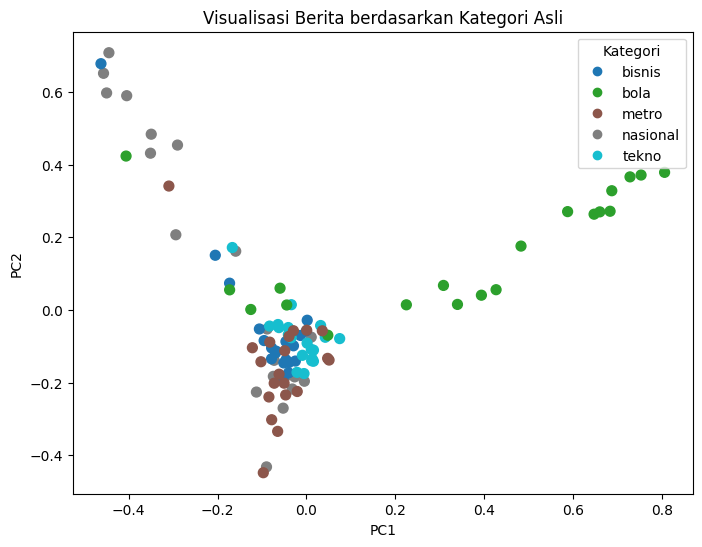

In [ ]:
X = df_pre_tfidf.select_dtypes(include=["int64","float64"])
X.columns = X.columns.astype(str)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pre_tfidf["PC1"] = X_pca[:,0]
df_pre_tfidf["PC2"] = X_pca[:,1]

plt.figure(figsize=(8,6))

if "Kategori" in df_pre_tfidf.columns:
    categories = df_pre_tfidf["Kategori"].astype("category")
    scatter = plt.scatter(df_pre_tfidf["PC1"], df_pre_tfidf["PC2"],
                          c=categories.cat.codes, cmap="tab10", s=50)

    handles, _ = scatter.legend_elements()
    plt.legend(handles, categories.cat.categories, title="Kategori", loc="best")

    plt.title("Visualisasi Berita berdasarkan Kategori Asli")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

## Clustering hasil WoE


Clustering dibawah ini akan menggunakan data yang sudah dihtung menggunakan woe

### Pengumpulan Data

data dikumpulkan melalui upload data yang sudah didapatkan melalui perhitungan woe

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith(".csv"):
        df_pre_woe = pd.read_csv(filename, encoding="utf-8", errors="ignore")
    else:  # jika excel
        df_pre_woe = pd.read_excel(filename)

    print(f"File {filename} berhasil dibaca")
    print(df_pre_woe.head())


Saving embedding_berita.xlsx to embedding_berita (2).xlsx
File embedding_berita (2).xlsx berhasil dibaca
  ID Berita  Kategori         0         1         2         3         4  \
0     debat  nasional -0.002732  0.000145  0.000959  0.000048 -0.001442   
1  sengketa  nasional -0.001344  0.000708  0.000199  0.000763 -0.001969   
2   respons  nasional -0.000989 -0.000581 -0.000489  0.001859 -0.001049   
3   rangkap  nasional  0.001812  0.003573 -0.000096 -0.001155  0.001226   
4    hadiri  nasional -0.002159  0.000314  0.000340 -0.000258 -0.000866   

          5         6         7  ...        90        91        92        93  \
0 -0.000378 -0.000226  0.003890  ...  0.001127  0.000455  0.001291 -0.001847   
1  0.000550  0.001023  0.001537  ... -0.000003  0.001656 -0.000389 -0.000657   
2 -0.000074 -0.000648  0.000884  ... -0.000423  0.000433 -0.000401 -0.001427   
3 -0.001877  0.003834  0.001921  ...  0.001465 -0.000166  0.000084 -0.000378   
4 -0.002984  0.000443  0.001487  ...  0.0006

### Proses Clusterisasi

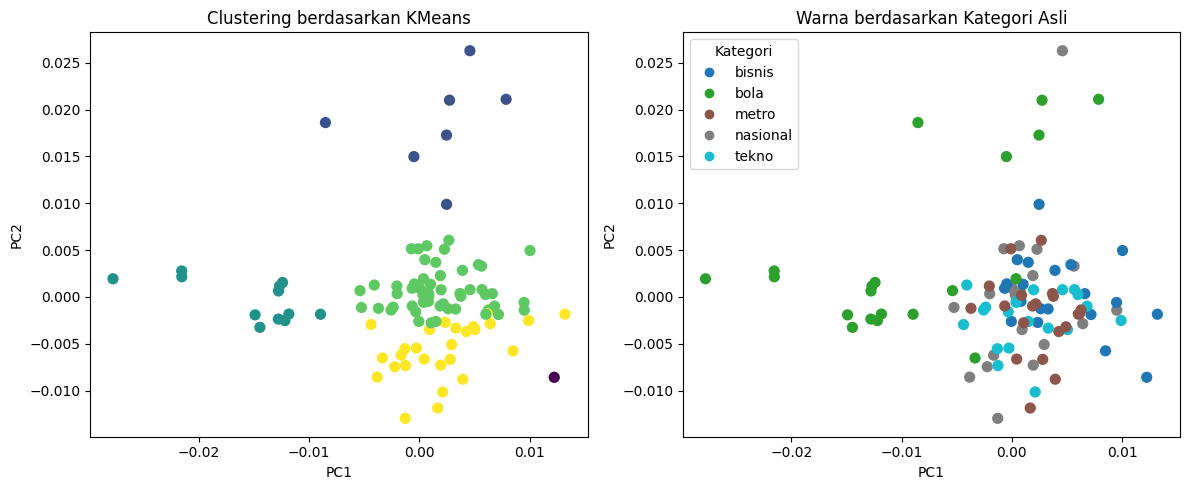

In [ ]:


# --- Ambil fitur numerik untuk clustering ---
X = df_pre_woe.select_dtypes(include=["int64", "float64"])
X.columns = X.columns.astype(str)   # <---- solusi error

# --- KMeans clustering ---
k = 5  # jumlah cluster bisa disesuaikan
kmeans = KMeans(n_clusters=k, random_state=42)
df_pre_woe["cluster"] = kmeans.fit_predict(X)


# --- PCA untuk visualisasi 2D ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pre_woe["PC1"] = X_pca[:,0]
df_pre_woe["PC2"] = X_pca[:,1]

# --- Plot Clustering vs Kategori ---
plt.figure(figsize=(12,5))

# Plot 1: Hasil clustering
plt.subplot(1,2,1)
plt.scatter(df_pre_woe["PC1"], df_pre_woe["PC2"], c=df_pre_woe["cluster"], cmap="viridis", s=50)
plt.title("Clustering berdasarkan KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot 2: Warna berdasarkan kategori asli
if "Kategori" in df_pre_woe.columns:
    plt.subplot(1,2,2)
    categories = df_pre_woe["Kategori"].astype("category")
    scatter = plt.scatter(df_pre_woe["PC1"], df_pre_woe["PC2"], c=categories.cat.codes, cmap="tab10", s=50)

    # Tambahkan legend sesuai nama kategori
    handles, _ = scatter.legend_elements()
    labels = categories.cat.categories
    plt.legend(handles, labels, title="Kategori", loc="best")

    plt.title("Warna berdasarkan Kategori Asli")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()


## **Perbandingan Clustering TF-IDF dan WoE**

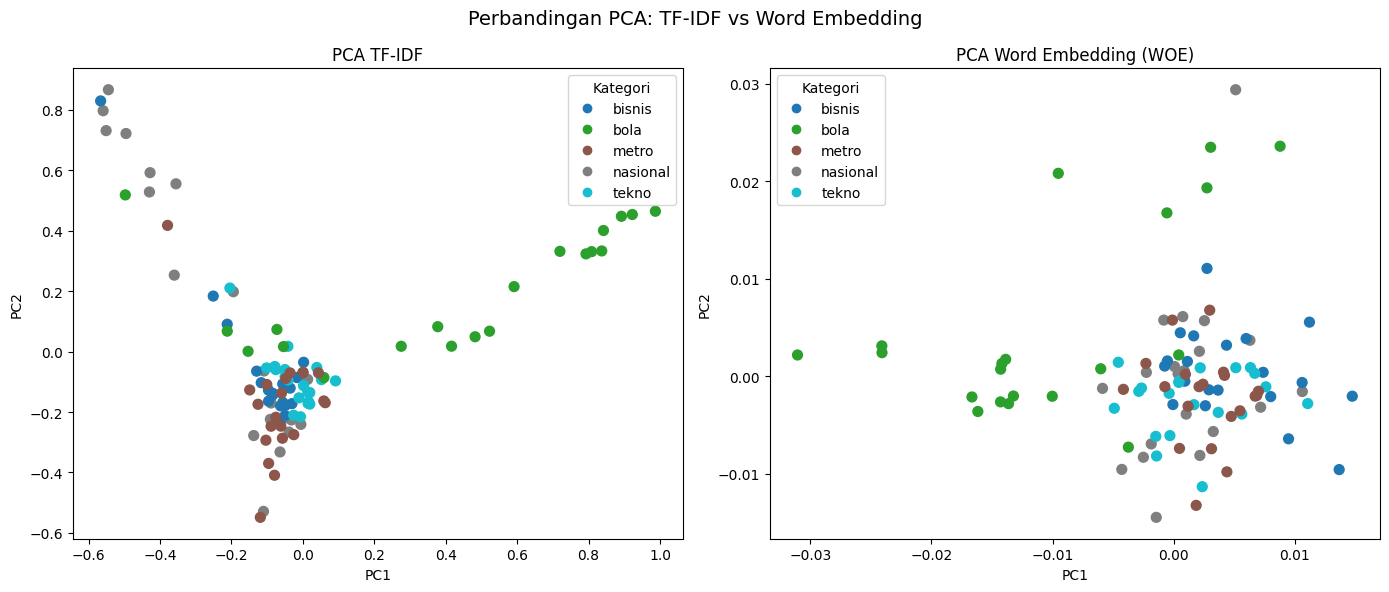

In [ ]:
X_tfidf = df_pre_tfidf.select_dtypes(include=["int64","float64"])
X_tfidf.columns = X_tfidf.columns.astype(str)

pca_tfidf = PCA(n_components=2)
X_pca_tfidf = pca_tfidf.fit_transform(X_tfidf)
df_pre_tfidf["PC1"] = X_pca_tfidf[:,0]
df_pre_tfidf["PC2"] = X_pca_tfidf[:,1]

X_woe = df_pre_woe.select_dtypes(include=["int64","float64"])
X_woe.columns = X_woe.columns.astype(str)

pca_woe = PCA(n_components=2)
X_pca_woe = pca_woe.fit_transform(X_woe)
df_pre_woe["PC1"] = X_pca_woe[:,0]
df_pre_woe["PC2"] = X_pca_woe[:,1]

# --- Plotting berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot TF-IDF
if "Kategori" in df_pre_tfidf.columns:
    categories_tfidf = df_pre_tfidf["Kategori"].astype("category")
    scatter1 = axes[0].scatter(df_pre_tfidf["PC1"], df_pre_tfidf["PC2"],
                               c=categories_tfidf.cat.codes, cmap="tab10", s=50)
    axes[0].set_title("PCA TF-IDF")
    axes[0].set_xlabel("PC1")
    axes[0].set_ylabel("PC2")

    handles1, _ = scatter1.legend_elements()
    axes[0].legend(handles1, categories_tfidf.cat.categories, title="Kategori", loc="best")

if "Kategori" in df_pre_woe.columns:
    categories_woe = df_pre_woe["Kategori"].astype("category")
    scatter2 = axes[1].scatter(df_pre_woe["PC1"], df_pre_woe["PC2"],
                               c=categories_woe.cat.codes, cmap="tab10", s=50)
    axes[1].set_title("PCA Word Embedding (WOE)")
    axes[1].set_xlabel("PC1")
    axes[1].set_ylabel("PC2")

    handles2, _ = scatter2.legend_elements()
    axes[1].legend(handles2, categories_woe.cat.categories, title="Kategori", loc="best")

plt.suptitle("Perbandingan PCA: TF-IDF vs Word Embedding", fontsize=14)
plt.tight_layout()
plt.show()


# CBoW

CBOW (Continuous Bag of Words) adalah salah satu arsitektur model Word2Vec yang digunakan untuk menghasilkan word embedding (representasi kata dalam bentuk vektor numerik).

### Instalasi Library

In [ ]:
!pip install plotly
from gensim.models import Word2Vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import pandas as pd

### Pengumpulan Data

In [ ]:

uploaded = files.upload()

for filename in uploaded.keys():
    df_pre_pta = pd.read_csv(filename)

df_pre_pta


Saving prepocessing_pta.csv to prepocessing_pta.csv


,id,penulis,judul,abstrak_id,pembimbing_pertama,pembimbing_kedua,prodi,cleaned_abstrak_id,tokenized_abstrak_id,stopwords_removed_abstrak_id,stemmed_abstrak_id
0,100211200002,Muhammad Zakaria Utomo,Pengukuran Website Quality Pada Situs Sistem A...,Aplikasi nyata pemanfaatan teknologi informasi...,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Manajemen,aplikasi nyata pemanfaatan teknologi informasi...,"['aplikasi', 'nyata', 'pemanfaatan', 'teknolog...","['aplikasi', 'nyata', 'pemanfaatan', 'teknolog...","['aplikasi', 'nyata', 'manfaat', 'teknologi', ..."
1,80211100044,Hendri Wahyudi Prayitno,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Abstrak\r\nPenelitian ini menggunakan metode k...,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Manajemen,abstrak penelitian ini menggunakan metode kuan...,"['abstrak', 'penelitian', 'ini', 'menggunakan'...","['abstrak', 'penelitian', 'metode', 'kuantitat...","['abstrak', 'teliti', 'metode', 'kuantitatif',..."
2,90211200001,Faishal,ANALISIS PERSEPSI BRAND ASSOCIATION MENURUT PE...,Tujuan penelitian ini adalah untuk mengetahui ...,Nurita Andriani,Yustina Chrismardani,Manajemen,tujuan penelitian ini adalah untuk mengetahui ...,"['tujuan', 'penelitian', 'ini', 'adalah', 'unt...","['tujuan', 'penelitian', 'persepsi', 'brand', ...","['tuju', 'teliti', 'persepsi', 'brand', 'assoc..."
3,80211100070,SATIYAH,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,"ABSTRAK\r\nSatiyah, Pengaruh Faktor-faktor Pel...","Dra. Hj. S. Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST.SE,M.MT",Manajemen,abstrak satiyah pengaruh faktorfaktor pelatiha...,"['abstrak', 'satiyah', 'pengaruh', 'faktorfakt...","['abstrak', 'satiyah', 'pengaruh', 'faktorfakt...","['abstrak', 'satiyah', 'pengaruh', 'faktorfakt..."
4,90211100079,Toni Budianto,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,ABSTRAK\r\n\r\nTujuan penelitian ini adalah un...,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Manajemen,abstrak tujuan penelitian ini adalah untuk men...,"['abstrak', 'tujuan', 'penelitian', 'ini', 'ad...","['abstrak', 'tujuan', 'penelitian', 'mengident...","['abstrak', 'tuju', 'teliti', 'identifikasi', ..."
...,...,...,...,...,...,...,...,...,...,...,...
1021,160211100291,Uswatun Hasanah,Pengaruh Pelatihan Dan Kompensasi Terhadap Pro...,"ABSTRAK\nUswatun Hasanah, 160211100291, Pengar...","Dr. Raden Mas Mochammad Wispandono S.E ., MS",NaN,Manajemen,abstrak uswatun hasanah pengaruh pelatihan dan...,"['abstrak', 'uswatun', 'hasanah', 'pengaruh', ...","['abstrak', 'uswatun', 'hasanah', 'pengaruh', ...","['abstrak', 'uswatun', 'hasanah', 'pengaruh', ..."
1022,160211100071,Husnul Hotimah,Analisis Cost Volume Profit Untuk Menentukan T...,ABSTRAK\nPenelitian ini bertujuan untuk menget...,"Hj. Evaliati Amaniyah, S.E., M.S.M.",NaN,Manajemen,abstrak penelitian ini bertujuan untuk mengeta...,"['abstrak', 'penelitian', 'ini', 'bertujuan', ...","['abstrak', 'penelitian', 'bertujuan', 'perhit...","['abstrak', 'teliti', 'tuju', 'hitung', 'tingk..."
1023,160211100030,INTAN YULLIA NINGSIH,BAURAN PROMOSI PADA DEALER YAMAHA TRETAN MOTOR...,ABSTRAK\nPenelitian ini bertujuan: (1) Untuk m...,"DR. MOHAMMAD ARIEF, S.E., M.M.",NaN,Manajemen,abstrak penelitian ini bertujuan untuk mengeta...,"['abstrak', 'penelitian', 'ini', 'bertujuan', ...","['abstrak', 'penelitian', 'bertujuan', 'bauran...","['abstrak', 'teliti', 'tuju', 'baur', 'promosi..."
1024,160211100041,Novia Prihastiwi Ningtyas,"ANALISA PENGARUH RASIO BOPO, LDR, ROA TERHADAP...",Tujuan penelitian ini adalah untuk mengetahui ...,"Hj. Evaliati Amaniyah, S.E., M.S.M",NaN,Manajemen,tujuan penelitian ini adalah untuk mengetahui ...,"['tujuan', 'penelitian', 'ini', 'adalah', 'unt...","['tujuan', 'penelitian', 'beban', 'operasional...","['tuju', 'teliti', 'beban', 'operasional', 'da..."


In [ ]:
df_pre_pta_clean = df_pre_pta["isi_clean_abstrak"] = df_pre_pta["stemmed_abstrak_id"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)


df_pre_pta[["stemmed_abstrak_id", "isi_clean_abstrak"]].head()

,stemmed_abstrak_id,isi_clean_abstrak
0,"['aplikasi', 'nyata', 'manfaat', 'teknologi', ...",aplikasi nyata manfaat teknologi informasi kom...
1,"['abstrak', 'teliti', 'metode', 'kuantitatif',...",abstrak teliti metode kuantitatif tekan uji hi...
2,"['tuju', 'teliti', 'persepsi', 'brand', 'assoc...",tuju teliti persepsi brand association langgan...
3,"['abstrak', 'satiyah', 'pengaruh', 'faktorfakt...",abstrak satiyah pengaruh faktorfaktor latih ke...
4,"['abstrak', 'tuju', 'teliti', 'identifikasi', ...",abstrak tuju teliti identifikasi variabelvaria...


In [ ]:
import pandas as pd
import ast
from gensim.models import Word2Vec

df_pre_pta = pd.read_csv("/content/prepocessing_pta.csv")

df_pre_pta["isi_clean_abstrak"] = df_pre_pta["stemmed_abstrak_id"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)

print(df_pre_pta[["stemmed_abstrak_id", "isi_clean_abstrak"]].head())

tokenized_texts = [str(text).split() for text in df_pre_pta["isi_clean_abstrak"]]

cbow_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=100,   # dimensi embedding
    window=5,
    min_count=2,
    sg=0,              # CBOW
    workers=4,
    epochs=20
)

# --- 5. Contoh penggunaan ---
print("\nJumlah kata dalam vocab:", len(cbow_model.wv))
print("Vektor untuk kata 'data':\n", cbow_model.wv["data"])

# --- 6. Cari kata yang paling mirip ---
print("\nKata yang mirip dengan 'data':")
print(cbow_model.wv.most_similar("data", topn=5))

# --- Simpan model ---
cbow_model.save("cbow_pta.csv")

# --- Download model ---
files.download("cbow_pta.csv")


                                  stemmed_abstrak_id  \
0  ['aplikasi', 'nyata', 'manfaat', 'teknologi', ...   
1  ['abstrak', 'teliti', 'metode', 'kuantitatif',...   
2  ['tuju', 'teliti', 'persepsi', 'brand', 'assoc...   
3  ['abstrak', 'satiyah', 'pengaruh', 'faktorfakt...   
4  ['abstrak', 'tuju', 'teliti', 'identifikasi', ...   

                                   isi_clean_abstrak  
0  aplikasi nyata manfaat teknologi informasi kom...  
1  abstrak teliti metode kuantitatif tekan uji hi...  
2  tuju teliti persepsi brand association langgan...  
3  abstrak satiyah pengaruh faktorfaktor latih ke...  
4  abstrak tuju teliti identifikasi variabelvaria...  

Jumlah kata dalam vocab: 3544
Vektor untuk kata 'data':
 [-1.3562667   0.2165612   0.21085703  1.6267769  -1.7806355   0.927282
 -1.5430015  -1.5051733  -0.5867923   0.503537   -0.18242991 -1.077895
 -1.2103202  -0.73781264 -0.19913857  1.2260445   1.1236113   0.01831667
  1.8054405  -2.0650156  -0.11472762  0.06281566  1.1636922 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Clustering**

Jumlah data tiap cluster:
cluster
1    367
4    214
2    171
0    149
3    125
Name: count, dtype: int64


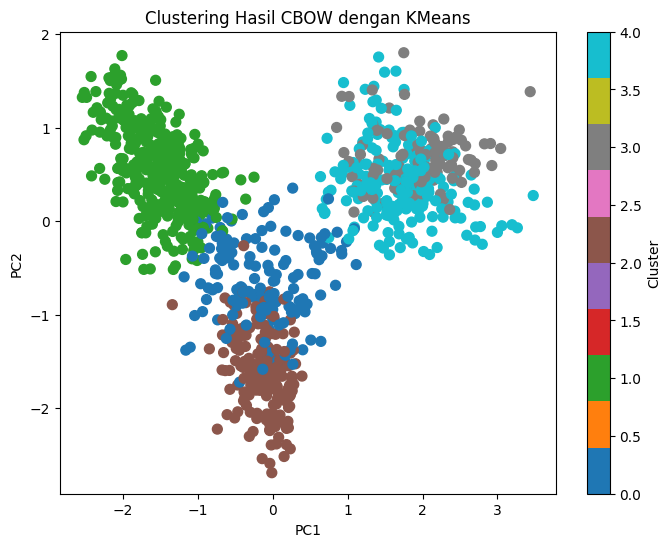

In [ ]:
k = 5   # misalnya 5 cluster
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_embeddings)
df_pre_pta["cluster"] = clusters

print("Jumlah data tiap cluster:")
print(df_pre_pta["cluster"].value_counts())

# Visualisasi dengan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embeddings)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10", s=50)
plt.title("Clustering Hasil CBOW dengan KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()
